# Digit Number

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
import numpy as np

np.random.seed(4)

## Dataset

In [2]:

mnist = fetch_openml('mnist_784')
X, y = mnist['data'].to_numpy(), mnist['target'].to_numpy().astype(int)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


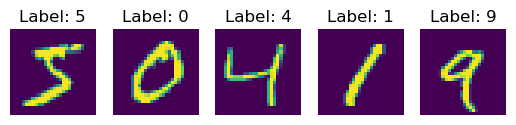

In [3]:
# show
num_imgs = 5
fig, axes = plt.subplots(1, num_imgs)
for i in range(num_imgs):
    axes[i].imshow(X[i].reshape(28,28))
    axes[i].set_title(f"Label: {y[i]}")
    axes[i].axis('off')
plt.show()

## Pre-Processing

In [4]:
y_ohe = OneHotEncoder().fit_transform(y.reshape(-1,1)).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y_ohe, test_size=0.2, random_state=12)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
def sigmoid(x):
    x = np.clip(x, -100, 100)
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return x * (1 - x)

In [6]:
def forward_prop(w1, w2, b1, b2, x):
    # IMPLEMENT HERE
    pass

def back_prop(m,w1,w2,z1,h1,z2,y_hat,x,y):
    # IMPLEMENT HERE
    pass

## Initialization

In [7]:
## Initialize weights
n_x = X_train.shape[1]
n_y = y_train.shape[1]
n_h = 100

w1 = np.random.rand(n_x, n_h) - 0.5
w2 = np.random.rand(n_h, n_y) - 0.5
b1 = np.random.rand(1, n_h) - 0.5
b2 = np.random.rand(1, n_y) - 0.5

## Main Loop

In [21]:
epoch = 30
losses = []
lr = 0.01  # Learning rate
m = X_train.shape[0]

# Training loop
for i in range(epoch):
    # Forward propagation
    z1 = np.dot(X_train, w1) + b1
    a1 = np.maximum(0, z1)  # ReLU activation
    z2 = np.dot(a1, w2) + b2
    y_hat = np.exp(z2) / np.sum(np.exp(z2), axis=1, keepdims=True)  # Softmax activation

    # Loss calculation (multi-class cross-entropy)
    loss = -(1 / m) * np.sum(y_train * np.log(y_hat + 1e-10))
    losses.append(loss)

    # Backward propagation
    dz2 = y_hat - y_train
    dw2 = (1 / m) * np.dot(a1.T, dz2)
    db2 = (1 / m) * np.sum(dz2, axis=0, keepdims=True)
    da1 = np.dot(dz2, w2.T)
    dz1 = da1 * (z1 > 0)  # Derivative of ReLU
    dw1 = (1 / m) * np.dot(X_train.T, dz1)
    db1 = (1 / m) * np.sum(dz1, axis=0, keepdims=True)

    # Update weights and biases
    w1 -= lr * dw1
    b1 -= lr * db1
    w2 -= lr * dw2
    b2 -= lr * db2

    # Print loss
    print(f'Epoch {i + 1}/{epoch}, Loss: {loss:.4f}')


Epoch 1/30, Loss: 6.5749
Epoch 2/30, Loss: 6.4596
Epoch 3/30, Loss: 6.3490
Epoch 4/30, Loss: 6.2429
Epoch 5/30, Loss: 6.1409
Epoch 6/30, Loss: 6.0429
Epoch 7/30, Loss: 5.9485
Epoch 8/30, Loss: 5.8577
Epoch 9/30, Loss: 5.7701
Epoch 10/30, Loss: 5.6855
Epoch 11/30, Loss: 5.6040
Epoch 12/30, Loss: 5.5251
Epoch 13/30, Loss: 5.4490
Epoch 14/30, Loss: 5.3752
Epoch 15/30, Loss: 5.3039
Epoch 16/30, Loss: 5.2347
Epoch 17/30, Loss: 5.1676
Epoch 18/30, Loss: 5.1025
Epoch 19/30, Loss: 5.0393
Epoch 20/30, Loss: 4.9779
Epoch 21/30, Loss: 4.9182
Epoch 22/30, Loss: 4.8602
Epoch 23/30, Loss: 4.8037
Epoch 24/30, Loss: 4.7487
Epoch 25/30, Loss: 4.6952
Epoch 26/30, Loss: 4.6430
Epoch 27/30, Loss: 4.5922
Epoch 28/30, Loss: 4.5426
Epoch 29/30, Loss: 4.4943
Epoch 30/30, Loss: 4.4473


TypeError: cannot unpack non-iterable NoneType object

## Loss

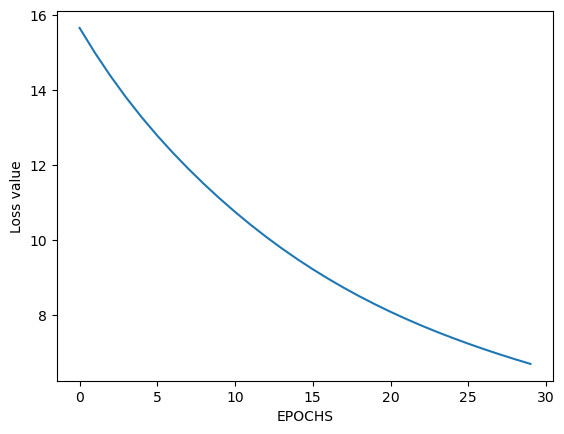

In [17]:
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

## Accuracy

In [22]:
_, _, _, y_test_hat = forward_prop(w1, w2, b1, b2, X_test)
y_test_hat_true = np.argmax(y_test_hat, axis=1)
accuracy = accuracy_score(y_test_true, y_test_hat_true)
print(f'loss: {loss:.2f}, acc: {accuracy:.2f}')

TypeError: cannot unpack non-iterable NoneType object